# Grade: /100 Mark(s)

# Assignment 02: Maximum Likelihood


### Maximum Likelihood

The exponential distribution https://en.wikipedia.org/wiki/Exponential_distribution is a continuous probability distribution often used to predict time when an event might ocurr, for instance Earthquake. 

If we know $y$ is influenced by feature $x$, then we can use the maximum likelihood principle to develop a regression model that estimates the mean of $Y$ given $X=x$.

In [1]:
# Packages for this assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

### Question 1: /10 Marks

The negative log likelihood for a exponential random variable is

$$\ell(\lambda; \mathbf{y}) = -\sum_{i=1}^N\Bigg(\ln(\lambda) - \lambda y_i \Bigg)$$

Here, $\mathbf{y}=(y_i) \in \mathbb{R^N}$ is a vector  and $\lambda$ is a scalar value.

Define a function called `exponentialNegLogLikelihood` that takes a vector  $\mathbf{y}$ and a parameter $\lambda$ and returns the negative log likelihood.

Test your function by calling it with `lamb = 2` and `y = np.array([1, 4, 6, 0])`.

Test your function by calling it with `lamb = np.array([1, 0.5, 2, 5])` and  `y = np.array([1.5, 2.1, 3.4, 0])`.

Answer in markdown:

* What happens when you set an element of lamb to 0 or a negative number. Why?

In [23]:
def exponentialNegLogLikelihood(lamb, y):
    return -np.sum(np.log(lamb) - lamb*y)

lamb1 = 2
y1 = np.array([1, 4, 6, 0])
test1 = exponentialNegLogLikelihood(lamb1, y1)
lamb2 = np.array([1, 0.5, 2, 5])
lamb0 = 0
lambneg = -2
y2 = np.array([1.5, 2.1, 3.4, 0])
test2 = exponentialNegLogLikelihood(lamb2, y2)
test0 = exponentialNegLogLikelihood(lamb0, y2)
testneg = exponentialNegLogLikelihood(lambneg, y2)

print("Test 1: ", test1, "\nTest2: ", test2, "\nWhen lambda is 0: ", test0, "\nWhen lambda is negative: ", testneg)

Test 1:  19.227411277760222 
Test2:  7.740562087565899 
When lambda is 0:  inf 
When lambda is negative:  nan


<ipython-input-23-f308da323b5f>:2: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(lamb) - lamb*y)
<ipython-input-23-f308da323b5f>:2: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(lamb) - lamb*y)


When an element of lambda is set to 0 or negative, there is a runtimewarning, and this is because you cannot log a negative number as it raises an error because it isnt in the range of logarithmic function. You cannot have lamb be 0 either as log 0 results in -infinity as it is not in the range either.

---

### Question 2: /15 Marks

Write a function called `exponentialRegressionNegLogLikelihood` that takes as arguments a vector $\mathbf{y}$ , a design matrix $\mathbf{X}$ of features, and a vector $\mathbf{\beta}$ of parameters. The function should return the negative log likelihood of this dataset, assuming that each element of  $\mathbf{y}$ is independent, and exponentially distributed with $\lambda=\exp(-\mathbf{X}\beta)$.

Test your function by calling it with 
* `b = np.array([1, 3])`
* `X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T`
* `y = np.array([0, 2.5, 10])`

In [13]:
def exponentialRegressionNegLogLikelihood(b, X, y):
    lamb = np.exp(-(X @ b))
    like = exponentialNegLogLikelihood(lamb, y)
    return like
b = np.array([1, 3])
X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T
y = np.array([0, 2.5, 10])
test = exponentialRegressionNegLogLikelihood(b, X, y)
test

26.60556862451103

### Question 3: /10 Marks

a) In `exponentialRegressionNegLogLikelihood`, what problem can happen if we assume that $\lambda = \mathbf{X}\beta$?.


b) What property of the exponential distribution is guaranteed when we assume that $\lambda$ has the form of $\exp(-\mathbf{X}\beta)$?: 

No more than 2 lines for each answer.

a) if we assume that lambda equals Xb, we are assuming a linear relationship, which will cause worse fitting and not accurate likelihood
b) 

### Question 4: /2.5 Marks

Define a function called `Prediction` whose arguments are a vector of coefficents $\beta$ and a design matrix $\mathbf{X}$, and its outputs are predictions of the form $\widehat{\mathbf{y}} = \exp(\mathbf{X}\beta)$. 

Test your function by calling it with 
* `b = np.array([1, 3])`
* `X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T`

In [16]:
def Prediction(b, X):
    y = np.exp(X @ b)
    return y
b = np.array([1, 3])
X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T
y = Prediction(b,X)
y

array([ 2980.95798704, 66171.16016838,  1808.04241446])

### Question 5: /15 Marks

Define a function called `Model_fit` which accepts as its first argument a design matrix $\mathbf{X}$ and as its second argument a vector of $\mathbf{y}$. Its output should be the maximum likelihood estimates for the coefficients of exponential regression of $\mathbf{y}$ onto $\mathbf{X}$.

Test your function by calling it with 
* `X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T`
* `y = np.array([0, 2.5, 10])`

Write the estimated coefficient $b$.

In [20]:
def Model_fit(X, y):
    nrows, ncols = X.shape
    beta = np.zeros((ncols,1)) #this is done to make sure dimensions are done right
    RES = minimize(exponentialRegressionNegLogLikelihood, beta, args = (X,y), method = "Powell", tol = 1e-8)
    return RES.x
X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T
y = np.array([0, 2.5, 10])
maxlik = Model_fit(X,y)
maxlik


array([ 1.14084805, -0.67998106])

### Question 6: /2.5 Marks

Define a function called `Squared_residual` which accepts as its first argument a design matrix $\mathbf{X}$, its second argument a vector of $\mathbf{y}$ and its third argument a vector $\beta$. Its output should be squared residual of the exponential regression model. This residual is defined as 

$$
\text{squared-residual} = \dfrac{1}{n}\sum_i (y_i-\hat{y}_i)^2
$$

Test your function by calling it with 
* `X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T`
* `y = np.array([2980, 66171, 1808])`
* `b = np.array([1, 3])`


In [21]:
def Squared_residual(X,y,b):
    y_hat = np.exp(X @ b)
    sqrd_res = (1/len(y)) * np.sum((y-y_hat)**2)
    return sqrd_res
X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T
y = np.array([2980, 66171, 1808])
b = np.array([1, 3])
SR = Squared_residual(X,y,b)
SR

0.315064022352556

### Question 7: /20 Mark(s)

Use the data `exponential_regression.csv`, where $y$ represents time units to fit a exponential regression using the functions that you already have created. 

* What are the estimated coefficients?
* Plot a scatterplot of the data that includes the model prediction over $x \in [-2.14, 2.14]$. Do not forget to include a graph title.
* Report the Squared residual in the plot

4056.8713440556294


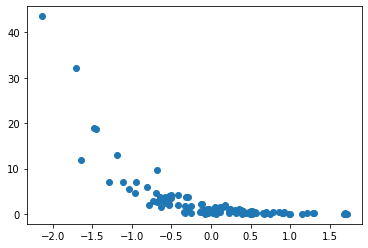

In [138]:
df = pd.read_csv("exponential_regression.csv")
# df.head()
xy = df["x;y"].values
X = []
y = []
for d in xy:
    X.append([float(d.split(';')[0])])
    y.append([float(d.split(';')[1])])
X = np.array(X)
y = np.array(y)
# print(X)
res = Model_fit(X, y)
res
# X_train = np.c_[np.ones(X.size), X]
# y_train = y.reshape(-1,1)
# x_pred = np.linspace(-2.14, 2.14, 100)
plt.scatter(X, y, label='Data')
SR = Squared_residual(X,y,res)
print(SR)

### Question 8:  /10 Marks

Fit a linear regression (ordinary least squares) to the data, and obtain parameter estimates and and plot the predictions over the same range. Report the Squared residual in the plot


Intercepts:
 [2.846] 

Coefficients:
 [[-5.114]]
4056.8713440556294


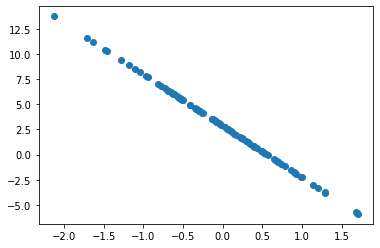

In [139]:
lr = LinearRegression().fit(X,y)
print(f"Intercepts:\n {lr.intercept_.round(3)} \n\nCoefficients:\n {lr.coef_.round(3)}")
y_hat = lr.predict(X)
y_hat
plt.scatter(X, y_hat, label='Data')
SR = Squared_residual(X,y,res)
print(SR)

### Question 9:  /10 Marks

Fit a linear regression (ordinary least squares) to the data with a square term, and obtain parameter estimates and and plot the predictions over the same range. Report the Squared residual in the plot.

Note that in this case the matrix X should look like 

$X =[[1,x_1,x_1^2],[1,x_2,x_2^2],...]$


In [145]:
newX = []
for i in X:
    newX.append([1, i[0], i[0]**2])
newX = np.array(newX)
# newX
new_lr = LinearRegression().fit(newX.T,y)
print(f"Intercepts:\n {new_lr.intercept_.round(3)} \n\nCoefficients:\n {new_lr.coef_.round(3)}")
y_hat = new_lr.predict(newX)
y_hat
plt.scatter(newX, y_hat, label='Data')
SR = Squared_residual(newX,y,res)
print(SR)

ValueError: Found input variables with inconsistent numbers of samples: [3, 101]

### Question 10: /5 Mark(s)

Between this three models which one would you select? What is the major problem with predictions from the other two models? Remember that in this case $y$ is measured in time units.

### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.